In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from nltk.corpus import PlaintextCorpusReader

In [2]:
# data를 corpus화
corpus_root = 'C://Users/cse_223/java_data_3000'
QACorpus = nltk.corpus.PlaintextCorpusReader(corpus_root, ".*\.txt", encoding="utf_8")

In [3]:
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

['file_1.txt',
 'file_10.txt',
 'file_100.txt',
 'file_1000.txt',
 'file_1001.txt',
 'file_1002.txt',
 'file_1003.txt',
 'file_1004.txt',
 'file_1005.txt',
 'file_1006.txt',
 'file_1007.txt',
 'file_1008.txt',
 'file_1009.txt',
 'file_101.txt',
 'file_1010.txt',
 'file_1011.txt',
 'file_1012.txt',
 'file_1013.txt',
 'file_1014.txt',
 'file_1015.txt',
 'file_1016.txt',
 'file_1017.txt',
 'file_1018.txt',
 'file_1019.txt',
 'file_102.txt',
 'file_1020.txt',
 'file_1021.txt',
 'file_1022.txt',
 'file_1023.txt',
 'file_1024.txt',
 'file_1025.txt',
 'file_1026.txt',
 'file_1027.txt',
 'file_1028.txt',
 'file_1029.txt',
 'file_103.txt',
 'file_1030.txt',
 'file_1031.txt',
 'file_1032.txt',
 'file_1033.txt',
 'file_1034.txt',
 'file_1035.txt',
 'file_1036.txt',
 'file_1037.txt',
 'file_1038.txt',
 'file_1039.txt',
 'file_104.txt',
 'file_1040.txt',
 'file_1041.txt',
 'file_1042.txt',
 'file_1043.txt',
 'file_1044.txt',
 'file_1045.txt',
 'file_1046.txt',
 'file_1047.txt',
 'file_1048.txt',
 '

In [4]:
titles = [title[:-4] for title in QACorpus.fileids()]
titles[:10]

['file_1',
 'file_10',
 'file_100',
 'file_1000',
 'file_1001',
 'file_1002',
 'file_1003',
 'file_1004',
 'file_1005',
 'file_1006']

In [5]:
synopses = [QACorpus.raw(title + ".txt") for title in titles]
synopses[:2]

['My app is crashing after I clicked the call butttonI am a starter in Android Studio, my app works fine but crasher every time i click the call button\r\n\r\n\r\nThis is my xml\r\n\r\n\r\n  \r\n\r\n    <LinearLayout\r\n        android:layout_weight="8"\r\n        android:layout_width="match_parent"\r\n        android:padding="10dp"\r\n        android:background="@drawable/recyclerview_bg"\r\n        android:layout_height="0dp">\r\n        <androidx.recyclerview.widget.RecyclerView\r\n            android:id="@+id/contactsRecycleView"\r\n            android:layout_width="match_parent"\r\n            android:layout_marginStart="3dp"\r\n            android:layout_marginTop="3dp"\r\n            android:layout_height="wrap_content"/>\r\n\r\n    </LinearLayout>\r\n\r\n</LinearLayout>\r\n\r\ntHIS IS MY MAIN.JAVA, I CANT REALLY MAKE IT IVE BEEN DOING THIS FOR A WEEK\r\n    private List<Contact> contacts;\r\n    private RecyclerView recyclerView;\r\n    private ContactAdapter adapter;\r\n\r\n  

In [6]:
# stopwords 단어 제거 하기 위해 nltk download 실행
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
# stopwords by english 이용하기
stopwords = nltk.corpus.stopwords.words('english')

In [8]:
# lemmatize(표제어(Lemma)는 한글로는 '표제어' 또는 '기본 사전형 단어' 정도의 의미) 이용하기
# lemmatize : 단어의 형태학적 파싱을 먼저 진행하기 위해
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
# 정규표현식과 Lemmatize를 사용해 필요한 단어만 추출
def tokenize_and_lemmatize(text):
    tokens  = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('^[a-zA-z]+$',token):
            filtered_tokens.append(token)
        if re.search('^[a-zA-z]+[0-9]+$',token):
            filtered_tokens.append(token)
        if re.search('^[0-9]+[a-zA-z]+$',token):
            filtered_tokens.append(token)
    lemmas = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lemmas

# 정규표현식을 사용해 필요한 단어만 추출, Lemmatize를 적용하기 전의 단어
def tokenize_only(text):
    tokens  = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('^[a-zA-z]+$',token):
            filtered_tokens.append(token)
        if re.search('^[a-zA-z]+[0-9]+$',token):
            filtered_tokens.append(token)
        if re.search('^[0-9]+[a-zA-z]+$',token):
            filtered_tokens.append(token)
    return filtered_tokens

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cse_223\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# synopses에 함수 적용해 단어 추출하기
totalvocab_lemmatized = []
totalvocab_tokenized = []
for i in synopses:
    allwords_lemmatized = tokenize_and_lemmatize(i)
    totalvocab_lemmatized.extend(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [12]:
# 결과 - 추출된 단어
print(totalvocab_lemmatized[:20])
print(totalvocab_tokenized[:20])

['my', 'app', 'is', 'crashing', 'after', 'i', 'clicked', 'the', 'call', 'butttoni', 'am', 'a', 'starter', 'in', 'android', 'studio', 'my', 'app', 'work', 'fine']
['My', 'app', 'is', 'crashing', 'after', 'I', 'clicked', 'the', 'call', 'butttonI', 'am', 'a', 'starter', 'in', 'Android', 'Studio', 'my', 'app', 'works', 'fine']


In [13]:
# 단어의 원형을 찾을 수 있게 하는 데이터
#vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_lemmatized)
#print("there are" + str(vocab_frame.shape[0]) + "items in vocab_frame")

In [14]:
#print(vocab_frame.head())

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 객체 선언
# max_df: 문서 내의 80% 이상이 그 단어로 이루어지면 고려 X
# min_idf: 적어도 20%의 문서 내에서 해당 단어를 포함하고 있어야 함
# max_features: feature의 최대 수 지정해주기
# ngram_range: 단어 collocation 몇개까지 할지
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_lemmatize, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

# TF-IDF 벡터화의 최종 결과물
print(tfidf_matrix.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Wall time: 16min 22s
(3000, 3900)


In [16]:
# 특징(단어사전) - 알파벳 순 정렬
terms = tfidf_vectorizer.get_feature_names() 
terms[:100]

['0dp',
 '10dp',
 '1l',
 '1st',
 '2d',
 '2d array',
 '2nd',
 '3rd',
 '[ [',
 '[ [ ]',
 '[ ] ]',
 '[ ] arr',
 '[ ] array',
 '[ ] b',
 '[ ] byte',
 '[ ] data',
 '[ ] element',
 '[ ] error',
 '[ ] list',
 '[ ] new',
 '[ ] null',
 '[ ] private',
 '[ ] public',
 '[ ] result',
 '[ ] return',
 '[ ] string',
 '[ ] value',
 '[ `` ]',
 '[ `` ``',
 '[ closed',
 '[ closed ]',
 '[ error',
 '[ error ]',
 '[ index',
 '[ index ]',
 '[ info',
 '[ info ]',
 '[ j',
 '[ j ]',
 '[ main',
 '[ main ]',
 '[ n',
 '[ n ]',
 '[ na',
 '[ na ]',
 '[ na na',
 '[ x',
 '\\',
 '\\ \\',
 '\\\\',
 '\\n',
 '\\n ``',
 '\\program',
 '] [ j',
 '] [ na',
 '] ]',
 '] `` [',
 '] `` ``',
 '] answer',
 '] args ``',
 '] args args',
 '] args int',
 '] args new',
 '] args scanner',
 '] args string',
 '] args throw',
 '] arr',
 '] array',
 '] b',
 '] byte',
 '] caused',
 '] closed',
 '] closed question',
 '] code',
 '] data',
 '] element',
 '] error',
 '] failed',
 '] http',
 '] info',
 '] int [',
 '] int int',
 '] java',
 '] list',

In [17]:
# document간의 distance를 젤 때 사용 -> 각도가 크면 클 수록 서로 동떨어진 자료
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

K-means clustering

In [18]:
from sklearn.cluster import KMeans

# 군집화 할 그룹의 갯수 정의
num_clusters = 21

# k-means 알고리즘 적용
km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 24.3 s


In [19]:
# pandas로 데이터 객체 생성하기
import pandas as pd

thesis = { 'Title': titles, 'Synopsis': synopses, 'Cluster': clusters}

frame = pd.DataFrame(thesis, index=[clusters], columns = ['Title', 'Synopsis', 'Cluster'])

In [20]:
frame.head(20)

,Title,Synopsis,Cluster
6,file_1,My app is crashing after I clicked the call bu...,6
12,file_10,How to sort the files in the directory in java...,12
8,file_100,Spring Data Neo4j field annotation validationT...,8
13,file_1000,Merging two foreign key columns into EmbeddedI...,13
10,file_1001,Deleting File/Directory and Recreating Before ...,10
12,file_1002,Why do i have an error when trying to start ap...,12
15,file_1003,How to use Google Drive API using AWS Lambda w...,15
19,file_1004,Read list of type parameter values using Scann...,19
5,file_1005,"Exception in thread ""main"" java.lang.IndexOutO...",5
4,file_1006,JERSEY Project Maven Configuration Problem wit...,4


In [21]:
# 각 cluster별로 분류된 파일 개수
frame['Cluster'].value_counts()

12    397
10    306
8     286
6     223
5     218
15    180
2     178
4     158
3     156
19    142
20    112
7     110
13     93
16     92
14     91
18     70
0      70
1      52
17     25
11     21
9      20
Name: Cluster, dtype: int64

In [22]:
# cluster별로 중요한 term들
from __future__ import print_function  

print("Top terms per cluster:")
print()  

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='') #replace 6 with n words per cluter
    for ind in order_centroids[i,:5]:
        print()
        
    print()
    print("Cluster %d titles:" % i, end='')
    
    
    for title in frame.loc[i]['Title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words:





Cluster 0 titles: file_1019, file_102, file_1199, file_1217, file_1220, file_1239, file_1315, file_1340, file_1356, file_1404, file_1416, file_1478, file_1492, file_1533, file_1563, file_160, file_162, file_1648, file_1777, file_1789, file_1799, file_1862, file_1905, file_1943, file_1967, file_2006, file_2054, file_206, file_2111, file_2143, file_2146, file_2174, file_2194, file_2234, file_2248, file_2266, file_2288, file_2303, file_2304, file_2320, file_2337, file_2385, file_2423, file_2805, file_32, file_326, file_373, file_380, file_454, file_516, file_525, file_558, file_619, file_629, file_634, file_65, file_68, file_685, file_691, file_762, file_808, file_829, file_83, file_839, file_905, file_932, file_946, file_968, file_97, file_995,

Cluster 1 words:





Cluster 1 titles: file_1162, file_1256, file_1273, file_1302, file_169, file_182, file_184, file_1858, file_1923, file_1986, file_201, file_2027, file_2041, file_2116, file_2220,

Multidimensional scaling

In [23]:
# 고차원 공간을 2차원으로 압축
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()#다차원 스케일링을 사용하여 dist 행렬을 2차원 배열로 변환

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [24]:
print(xs[:10])
print(ys[:10])

[-0.16975044 -0.06960554 -0.46548468 -0.29756478 -0.01363697 -0.1930084
  0.58674166  0.10749454 -0.09759016  0.29291747]
[ 0.19399881 -0.34671553 -0.38446173  0.51626729  0.50049002  0.55727197
 -0.10634029  0.16667297 -0.56298689 -0.46393795]


Visualizing document clusters

In [25]:
# 딕셔너리를 사용해 색상 설정하기
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#b2182b', 6:'#3f007d',7:'#8dd3c7', 8:'#f1a340',9:'#35978f',
                 10: '#f5f545',  11: '#18d3e9', 12: '#1a19c8', 13: '#68f545', 14:'#010b12', 15:'#065b96', 16:'#28d4ac',17:'#32727d', 18:'#3f1554', 
                 19:'#61075c', 20:'#ba4c07'}
# 딕셔너리를 사용해 클러스터 이름 지정하기(단어로 지정 가능)
cluster_names = {0: 'Cluster 0', 
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4',
                 5: 'Cluster 5', 
                 6: 'Cluster 6', 
                 7: 'Cluster 7', 
                 8: 'Cluster 8',
                 9: 'Cluster 9',
                 10: 'Cluster 10',
                 11: 'Cluster 11',
                 12: 'Cluster 12',
                 13: 'Cluster 13',
                 14: 'Cluster 14',
                 15: 'Cluster 15',
                 16: 'Cluster 16',
                 17: 'Cluster 17',
                 18: 'Cluster 18',
                 19: 'Cluster 19',
                 20: 'Cluster 20'
                }

In [26]:
# DataFrame 생성하기
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 
df.head(10)

,x,y,label,title
0,-0.169750,0.193999,6,file_1
1,-0.069606,-0.346716,12,file_10
2,-0.465485,-0.384462,8,file_100
3,-0.297565,0.516267,13,file_1000
4,-0.013637,0.500490,10,file_1001
5,-0.193008,0.557272,12,file_1002
6,0.586742,-0.106340,15,file_1003
7,0.107495,0.166673,19,file_1004
8,-0.097590,-0.562987,5,file_1005
9,0.292917,-0.463938,4,file_1006


In [27]:
# cluster로 group화 하기
groups = df.groupby('label')
groups.size()

label
0      70
1      52
2     178
3     156
4     158
5     218
6     223
7     110
8     286
9      20
10    306
11     21
12    397
13     93
14     91
15    180
16     92
17     25
18     70
19    142
20    112
dtype: int64

In [28]:
for name, group in groups:
    print("Cluster", name)
    print(group)
    print()

Cluster 0
             x         y  label      title
23    0.046832 -0.113584      0  file_1019
24    0.086074  0.299328      0   file_102
222  -0.256746 -0.237034      0  file_1199
243   0.276115 -0.203530      0  file_1217
247  -0.548509  0.422161      0  file_1220
...        ...       ...    ...        ...
2926  0.010924  0.276188      0   file_932
2941  0.323222  0.243310      0   file_946
2965 -0.424759  0.462153      0   file_968
2967  0.085668  0.237611      0    file_97
2995 -0.161534  0.448803      0   file_995

[70 rows x 4 columns]

Cluster 1
             x         y  label      title
182  -0.292725 -0.409796      1  file_1162
286  -0.593347  0.242704      1  file_1256
305  -0.627910  0.189521      1  file_1273
338  -0.455120 -0.438810      1  file_1302
767  -0.647310 -0.356996      1   file_169
912   0.510014 -0.389845      1   file_182
934  -0.628958  0.122463      1   file_184
954  -0.512314 -0.409294      1  file_1858
1027 -0.301040 -0.237000      1  file_1923
1096 -0.47

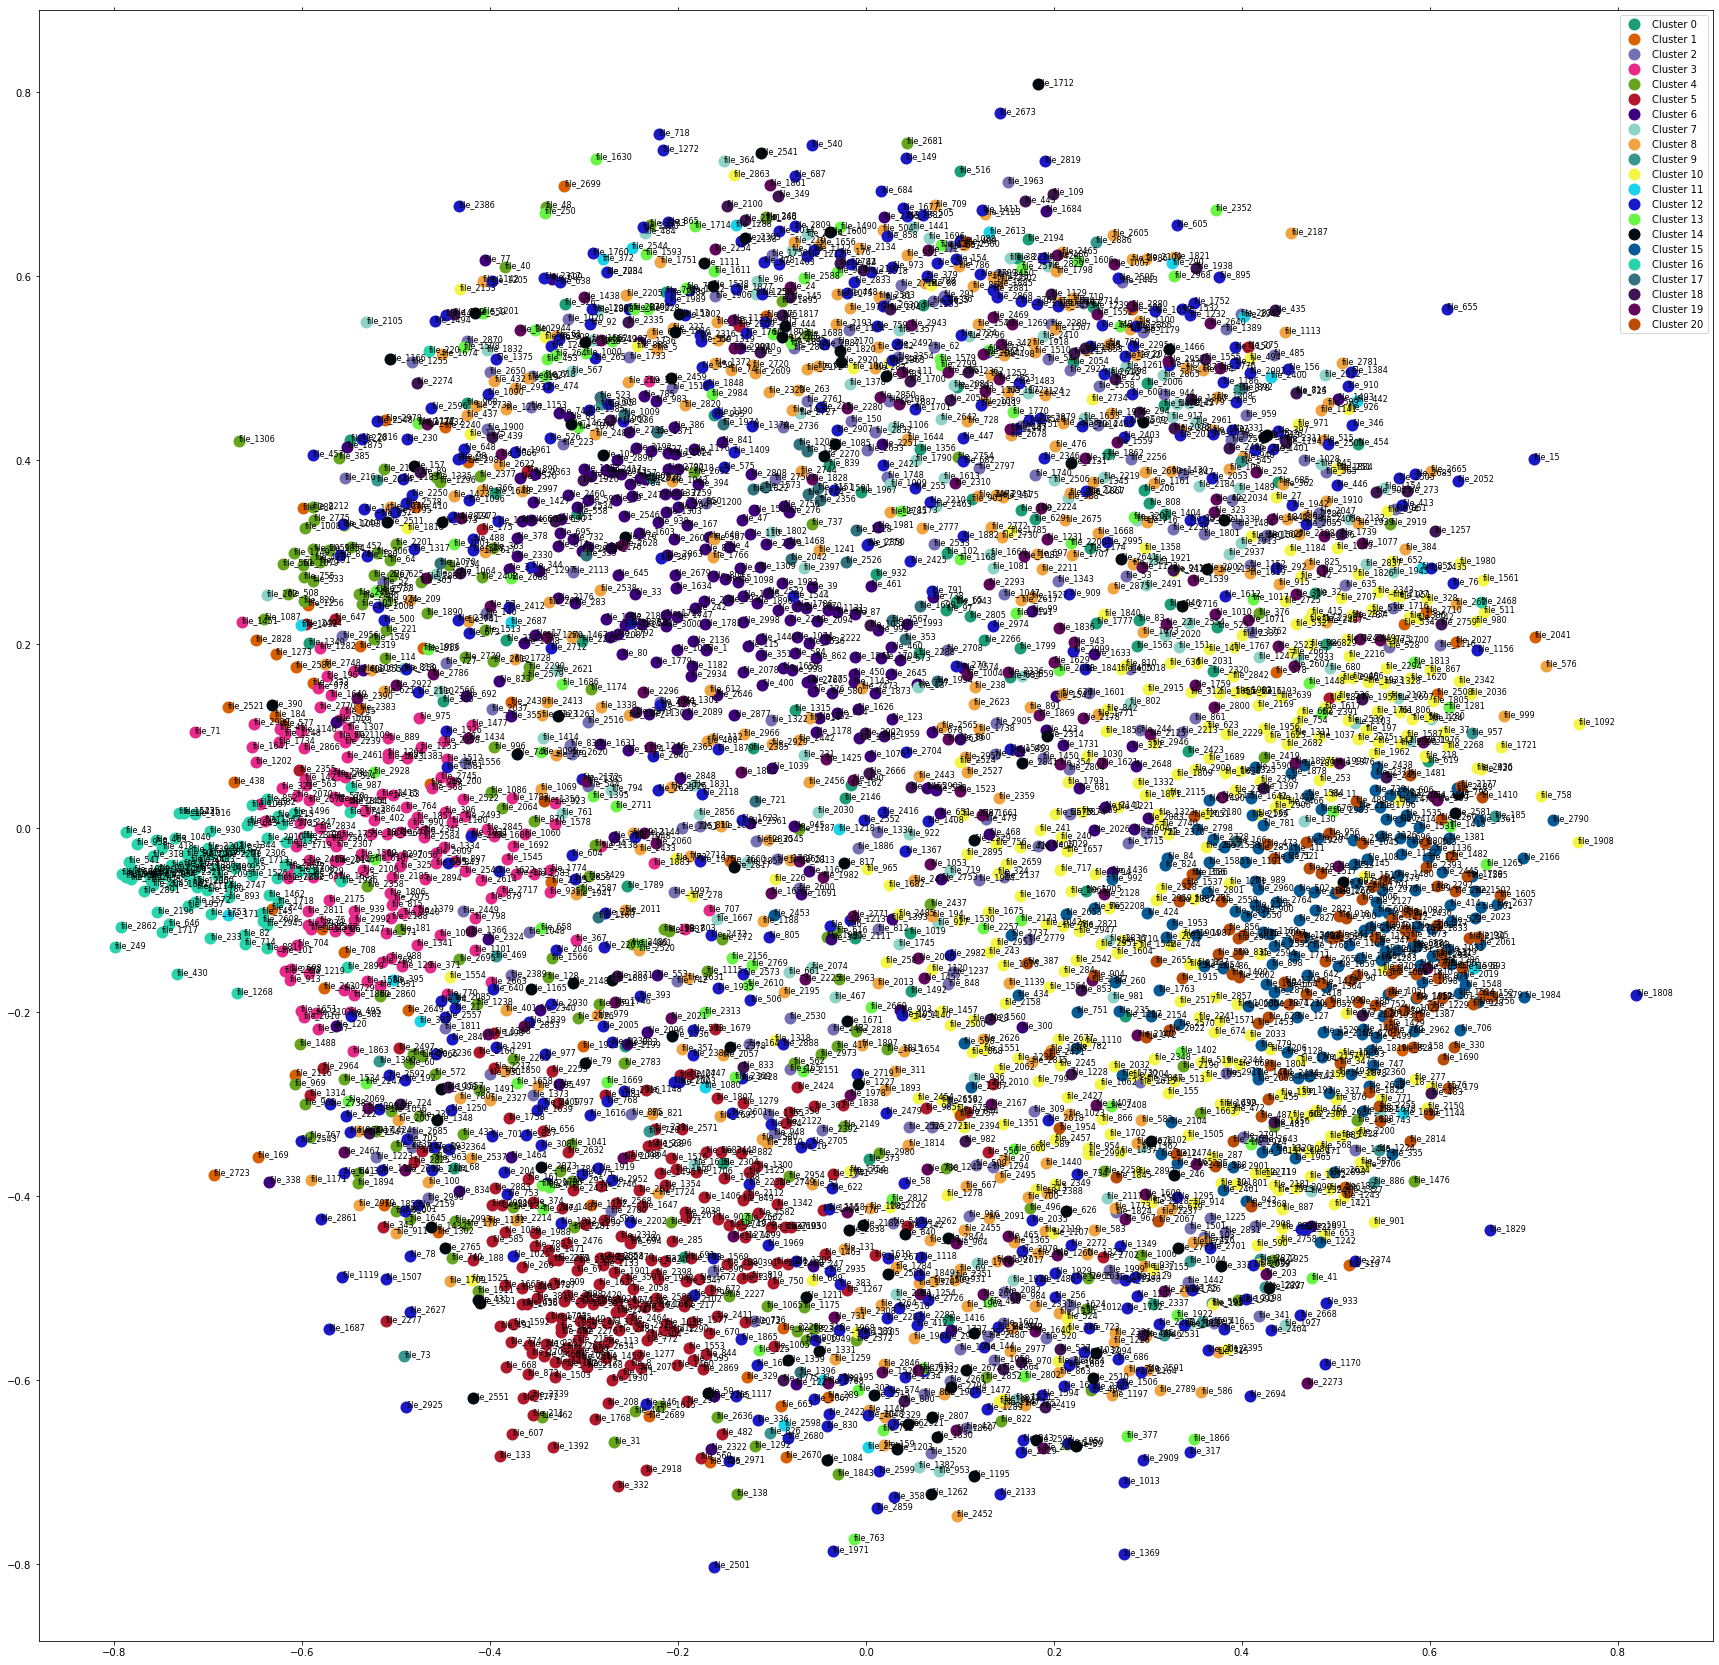

In [29]:
fig, ax = plt.subplots(figsize=(30, 30)) # size 지정하기
ax.margins(0.05) # 5% padding 추가하기

# iterate through groups to layer the plot
# name에는 cluster number가 group에는 데이터들이 저장
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',        # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')

# legend 설정하기
ax.legend(numpoints=1)  #show legend with only 1 point

# (x, y)위치에 논문 title 텍스트 추가하기 
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

#show the plot
plt.show()

In [30]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [31]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=8, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

Hierarchical document clustering

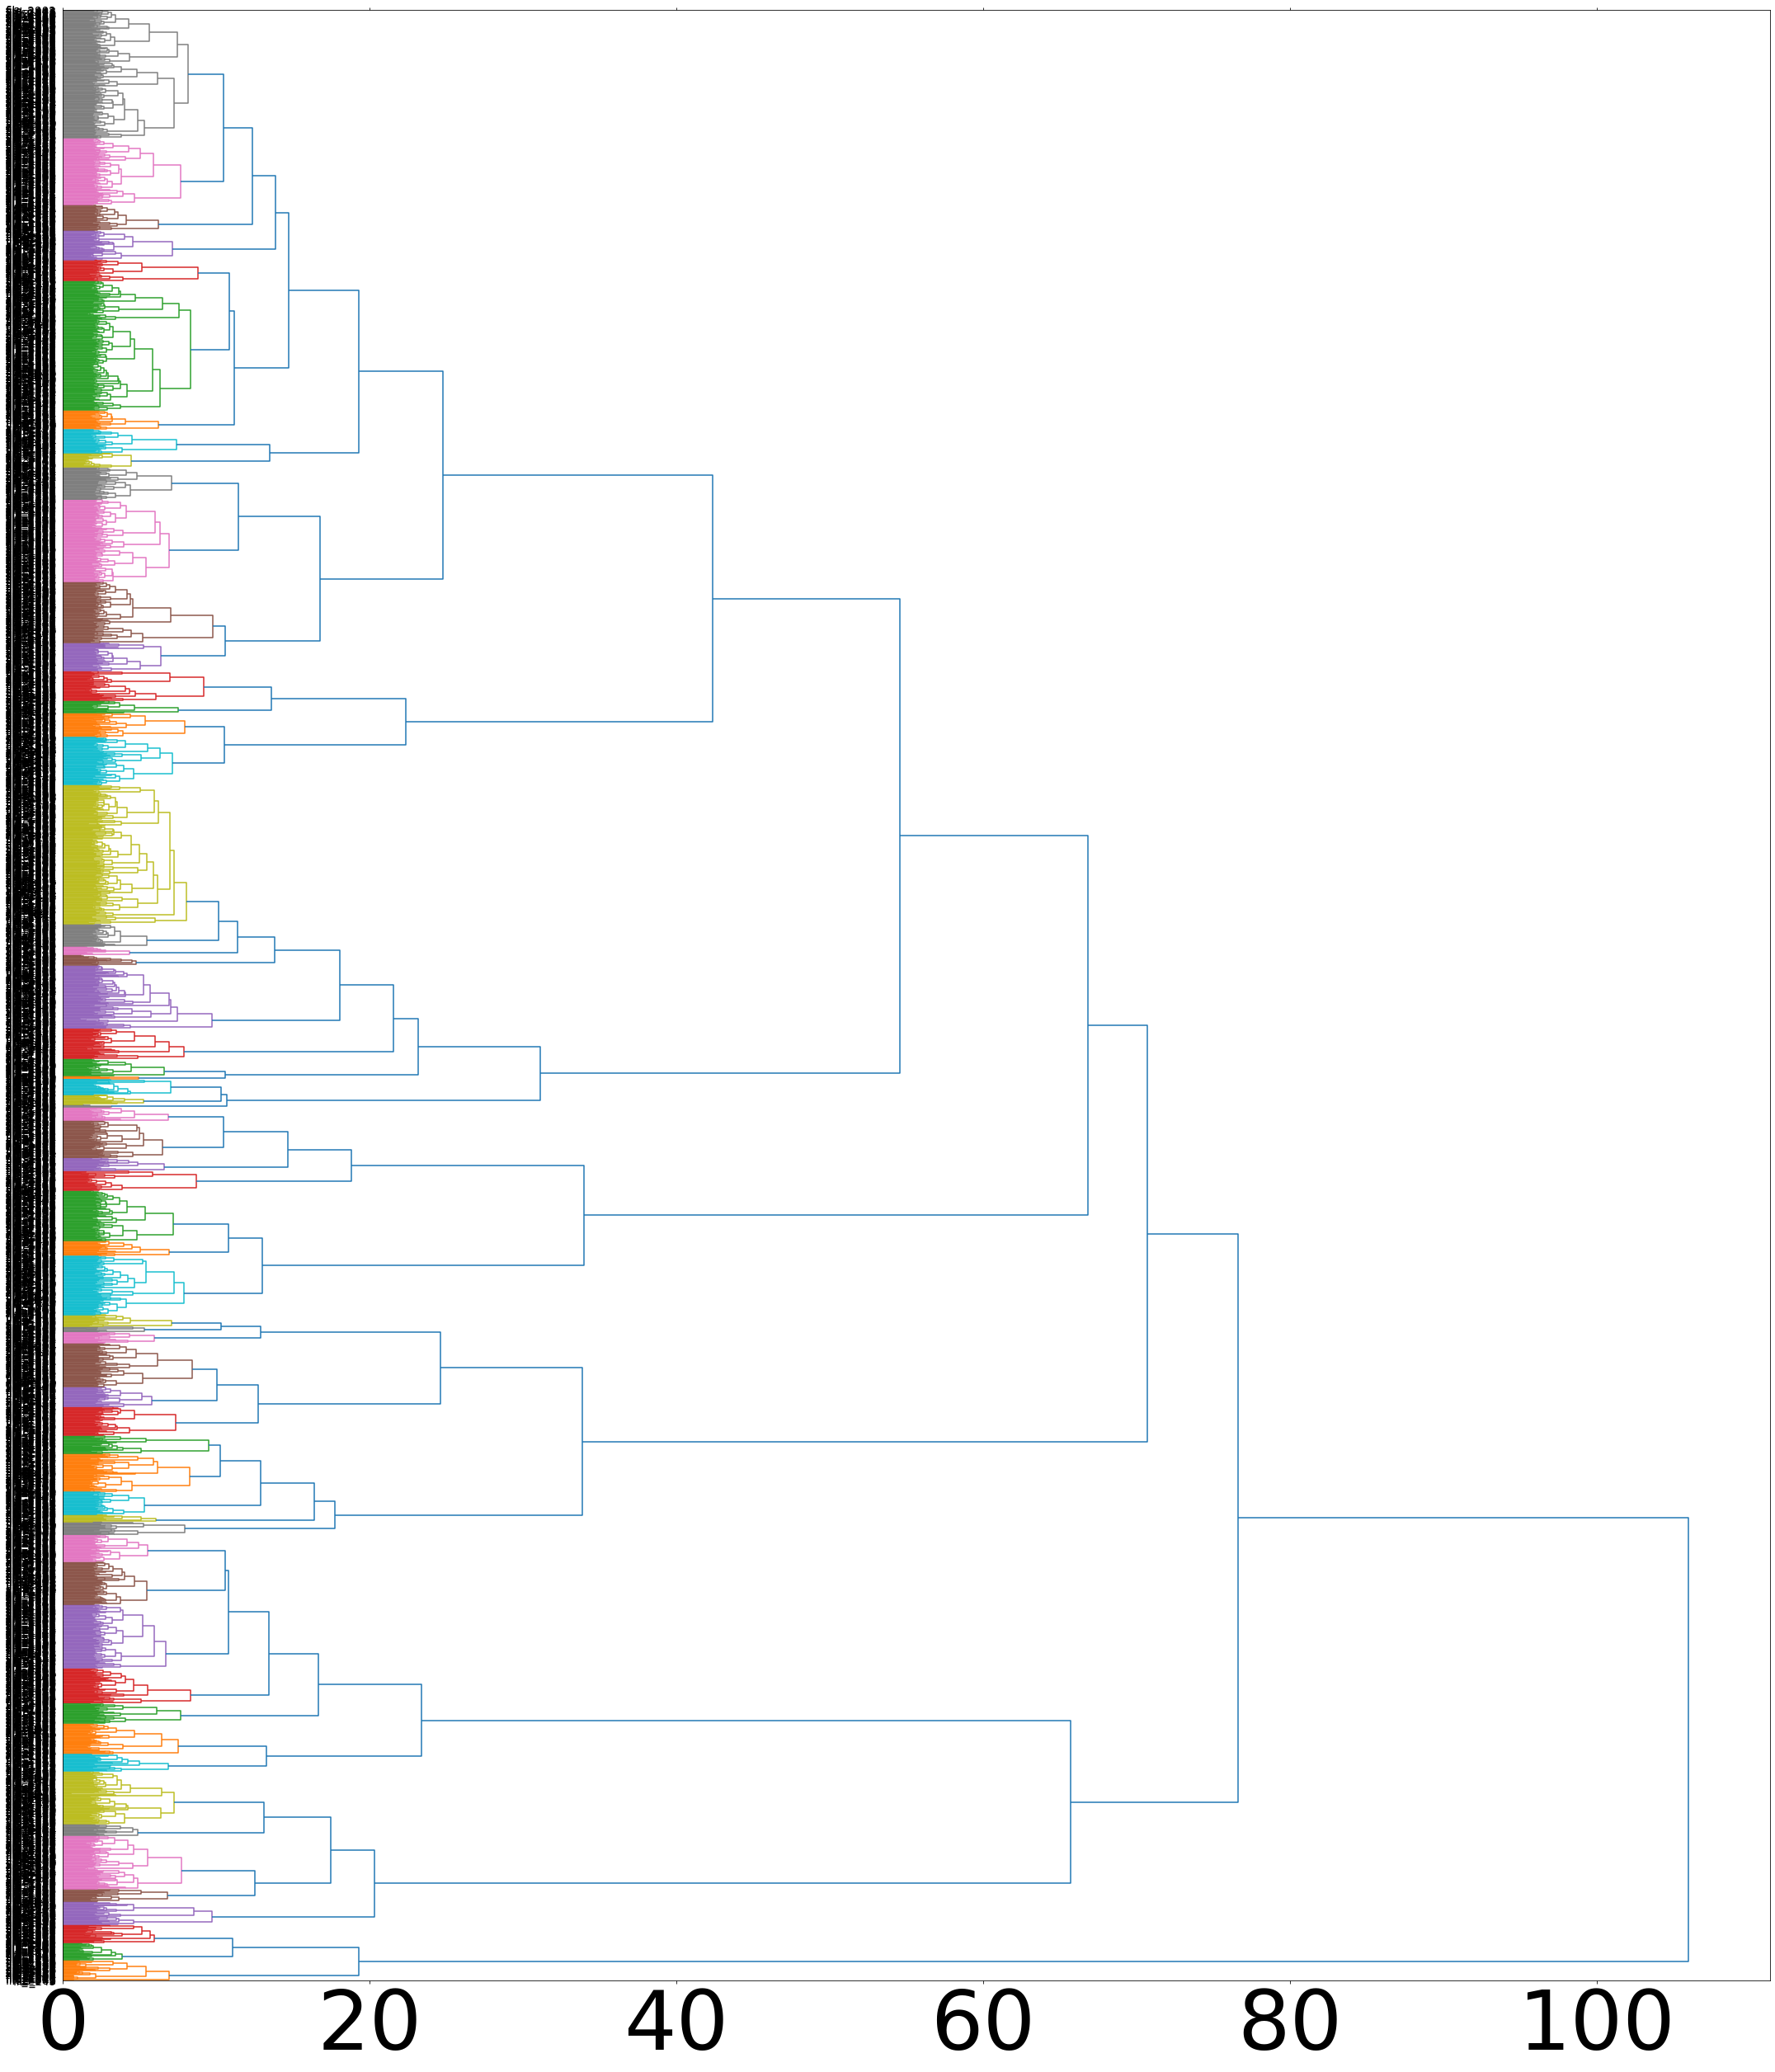

In [32]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(30, 35)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles, color_threshold=10, leaf_font_size = 13.5);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    labelsize = 100,
)

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters_QA.png', dpi=200) #save figure as ward_clusters

In [33]:
plt.close()

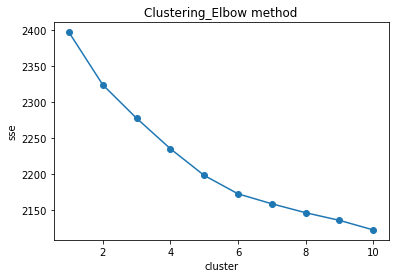

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,11), sse, marker='o')
plt.title("Clustering_Elbow method")
plt.xlabel("cluster")
plt.ylabel("sse")
plt.show()

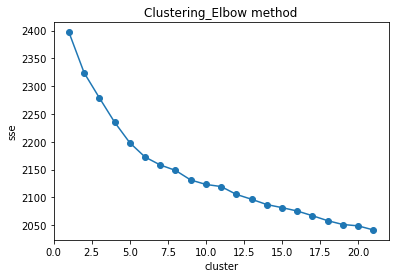

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1,22):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,22), sse, marker='o')
plt.title("Clustering_Elbow method")
plt.xlabel("cluster")
plt.ylabel("sse")
plt.show()

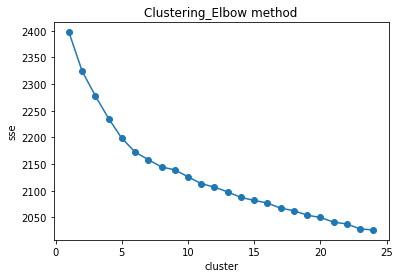

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for i in range(1,25):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(tfidf_matrix)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,25), sse, marker='o')
plt.title("Clustering_Elbow method")
plt.xlabel("cluster")
plt.ylabel("sse")
plt.show()